This is the template for reducing dimension to display clusters after applying Kmeans

             0         1         2         3         4         5         6  \
0     0.138214  0.497400 -0.829572 -0.100135 -0.787277  0.379078  0.268074   
1     0.227302  0.584465 -0.689458  0.070220 -0.820507 -0.275694 -0.009422   
2     0.042346  0.312285  0.511500 -0.717370 -0.468333 -0.235002 -0.511344   
3     0.113903  0.489457  0.123503 -0.880199 -0.112790 -0.168259 -0.262996   
4    -0.038691  0.298722 -0.197096  0.309246 -0.043247 -0.417489  0.972337   
...        ...       ...       ...       ...       ...       ...       ...   
3671  0.249813  0.468338 -0.836292 -0.123801 -0.516876 -0.191083  0.073179   
3672  0.851166  0.072781  0.019768 -0.442951  0.223331  0.557770  0.408470   
3673  0.342510  0.321796 -0.239917  0.358712 -0.097061 -0.302672  0.398780   
3674  0.127888  0.596406 -0.490276 -0.144895 -0.146875 -0.016429  0.361749   
3675  0.070134  0.307033  0.578221 -0.732688 -0.423581 -0.270799 -0.426181   

             7         8         9  ...       758       759    

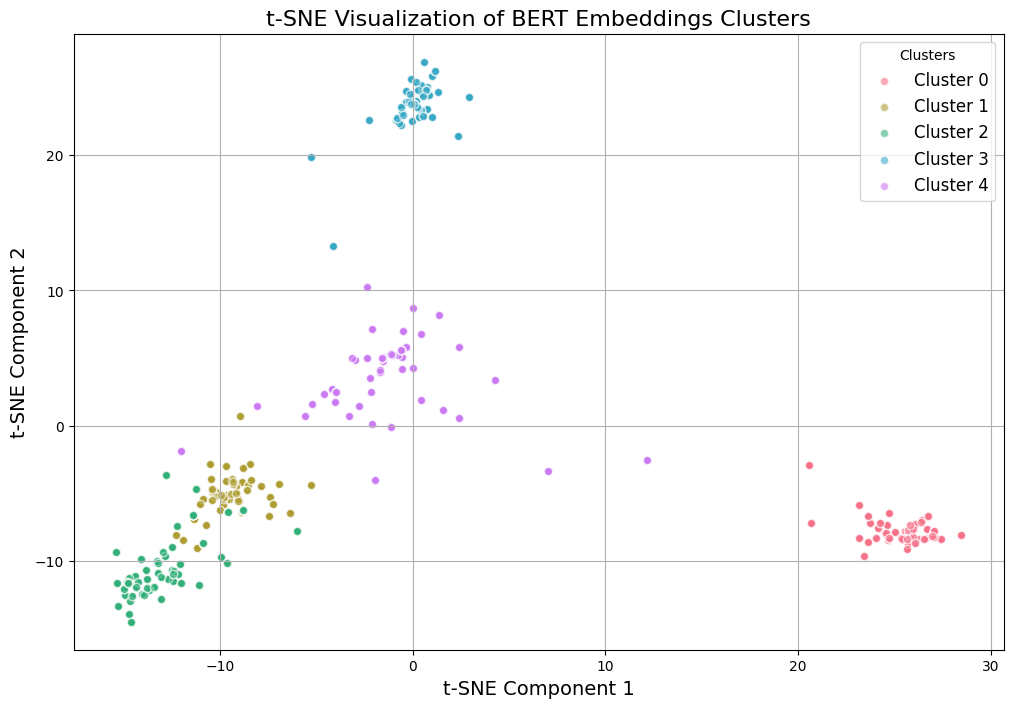

In [10]:
#template for visualization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns  # For better color palettes

# Load your BERT embeddings data
df = pd.read_csv(r'D:\CODING\Project\NVIDIA-Stock-prediction\data\synthesis\embedding\BERT_EmbeddingText.csv')
df = df.drop('timestamp', axis=1)
print(df)
# Standardize the data
df = pd.DataFrame(StandardScaler().fit_transform(df))

# Perform K-Means clustering
n_clusters = 5  # Set the number of clusters
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(df)

# Calculate silhouette score
silhouette_avg = silhouette_score(df, model.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Add cluster labels to the original DataFrame

# Dimensionality reduction for visualization using t-SNE
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(df)

# Create a DataFrame for t-SNE results
pca_df = pd.DataFrame(pca_results, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = model.labels_

# Create a color palette
palette = sns.color_palette("husl", n_clusters)  # Generates a palette with distinct colors

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Component 1'], subset['Component 2'],
                label=f'Cluster {cluster}',
                color=palette[cluster],  # Unique color for each cluster
                alpha=0.6,
                edgecolor='w')  # Optional: white edge color for better visibility

# Customize the plot
plt.title('t-SNE Visualization of BERT Embeddings Clusters', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Clusters', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
#template for visualization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns  # For better color palettes

# Load your BERT embeddings data
df = pd.read_csv(r'D:\CODING\Project\NVIDIA-Stock-prediction\data\synthesis\embedding\T5_EmbeddingText.csv')
df = df.drop('timestamp', axis=1)
print(df)
# Standardize the data
df = pd.DataFrame(StandardScaler().fit_transform(df))

# Perform K-Means clustering
n_clusters = 5  # Set the number of clusters
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(df)

# Calculate silhouette score
silhouette_avg = silhouette_score(df, model.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Add cluster labels to the original DataFrame

# Dimensionality reduction for visualization using t-SNE
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(df)

# Create a DataFrame for t-SNE results
pca_df = pd.DataFrame(pca_results, columns=['Component 1', 'Component 2'])

# Create a color palette
palette = sns.color_palette("husl", n_clusters)  # Generates a palette with distinct colors
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['Component 1'], pca_df['Component 2'],
                color='lightblue',  # Unique color for each cluster
                alpha=0.6,
                edgecolor='w')

# Customize the plot
plt.title('t-SNE Visualization of T5 Embeddings', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.grid(True)
plt.show()
